## Suliman Alotaibi mini project

## Project Objective:

The aim of this project is to predict the presence of cars and motorcycles moving on the dedicated bus lane, which disrupts the speed of buses. These bus lanes are specifically designed to provide people with a fast and efficient means of transportation between stations, allowing them to reach their destinations quickly while avoiding the traffic congestion caused by cars and motorcycles.

## About Dataset
This is a vehicle image classification dataset containing images of four different types of vehicles: Car, Bus, and Motorcycle. The dataset is curated to help learners to develop and evaluate image classification models for identifying various vehicle types from images.

https://www.kaggle.com/datasets/kaggleashwin/vehicle-type-recognition

In [44]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import shutil
import glob
import itertools
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from keras import models,layers


In [6]:
# Ensure GPU availability
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(f"{len(gpus)} Physical GPUs, {len(logical_gpus)} Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
else:
    print("No GPUs found. Running on CPU instead.")

1 Physical GPUs, 1 Logical GPUs


In [21]:
#orgnize data into train,test,valid
'''
First think that what i do here is my data is one folder that have the images of cars in buss aloe the motors
every images have in first name belong to, so i spilt my data here two three folder path for train and test and valid

'''
os.chdir('/content/my_data')

if not os.path.exists('train/car'):
    os.makedirs('train/car')
    os.makedirs('train/bus')
    os.makedirs('train/mot')
    os.makedirs('valid/car')
    os.makedirs('valid/bus')
    os.makedirs('valid/mot')
    os.makedirs('test/car')
    os.makedirs('test/bus')
    os.makedirs('test/mot')
'''
here the the spilt that i implement 69 images for train 20 for valid and 10 for test
for all my classes that i have

'''

    for c in random.sample(glob.glob('car*'), 69):
        shutil.move(c, 'train/car' )
    for c in random.sample(glob.glob('bus*'), 69):
        shutil.move(c, 'train/bus')
    for c in random.sample(glob.glob('mot*'), 69):
        shutil.move(c, 'train/mot')
    for c in random.sample(glob.glob('car*'), 20):
        shutil.move(c, 'valid/car')
    for c in random.sample(glob.glob('bus*'), 20):
        shutil.move(c, 'valid/bus')
    for c in random.sample(glob.glob('mot*'), 20):
        shutil.move(c, 'valid/mot')
    for c in random.sample(glob.glob('car*'), 10):
        shutil.move(c, 'test/car')
    for c in random.sample(glob.glob('bus*'), 10):
        shutil.move(c, 'test/bus')
    for c in random.sample(glob.glob('mot*'), 10):
        shutil.move(c, 'test/mot')



In [23]:
#assign an valrbale that have the path of train and valid and test
train_path = '/content/my_data/train'
valid_path = '/content/my_data/valid'
test_path = '/content/my_data/test'

In [28]:
#to be sure all the images in the same size before statring my model i use ImageDataGenerator with vgg16
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path, target_size=(224,224), classes = ['car','bus','mot'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes = ['car','bus','mot'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_path, target_size=(224,224), classes = ['car','bus','mot'], batch_size=10, shuffle=False)

Found 207 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [29]:
#to bring images from my data train_batches
img , label = next(train_batches)

In [30]:
#functin to plot the images
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout
    plt.show()

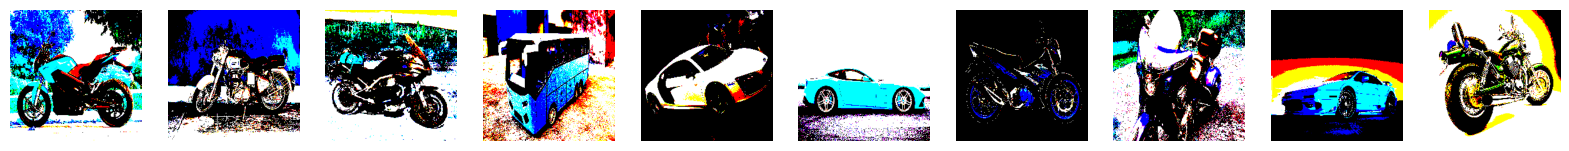

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [31]:
#plot the images with labels
plotImages(img)
print(label)


In [36]:
'''
bulding the model, with start the filters 32 for the kerinal 3*3 metrix activatin relu for the hidden layer
and padding for if is more pixel is take the same and don't take care for road input size 224*224*3 for the image
3 is for the color rbg
'''
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3) ,activation = 'relu', padding = 'same' , input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3),activation = 'relu', padding = 'same'),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=3, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │         602,115 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 621,507 (2.37 MB)

 Trainable params: 621,507 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
'''
comiling the model with adam optimizer we use categorical_crossentropy loss beacuse we
have more then two class and we want predict the class with the highest probability
'''
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
'''
fiting the model but like we see there is offerfing
'''
pred = model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
21/21 - 6s - 305ms/step - accuracy: 0.9952 - loss: 0.0103 - val_accuracy: 0.7667 - val_loss: 6.1014
Epoch 2/10
21/21 - 5s - 221ms/step - accuracy: 0.9952 - loss: 0.0321 - val_accuracy: 0.7500 - val_loss: 6.2359
Epoch 3/10
21/21 - 5s - 237ms/step - accuracy: 0.9952 - loss: 0.1691 - val_accuracy: 0.7667 - val_loss: 6.0934
Epoch 4/10
21/21 - 6s - 294ms/step - accuracy: 1.0000 - loss: 7.9385e-05 - val_accuracy: 0.6500 - val_loss: 9.7636
Epoch 5/10
21/21 - 9s - 449ms/step - accuracy: 0.9903 - loss: 0.1001 - val_accuracy: 0.8000 - val_loss: 4.7765
Epoch 6/10
21/21 - 5s - 224ms/step - accuracy: 1.0000 - loss: 5.7589e-10 - val_accuracy: 0.7500 - val_loss: 5.3523
Epoch 7/10
21/21 - 5s - 234ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.7667 - val_loss: 5.6598
Epoch 8/10
21/21 - 6s - 294ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.7667 - val_loss: 5.6984
Epoch 9/10
21/21 - 5s - 216ms/step - accuracy: 1.0000 - loss: 5.7589e-10 - val_accuracy: 0.7667 

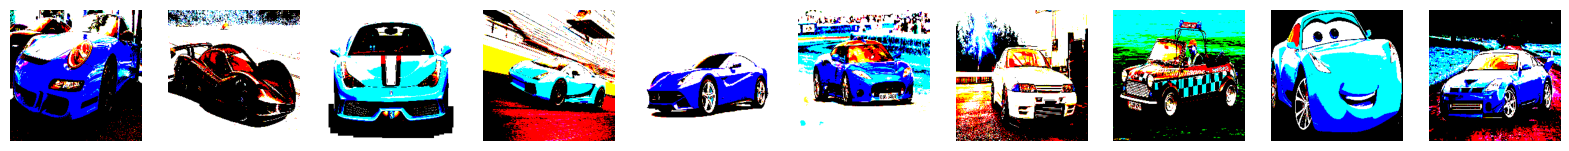

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [43]:
'''
bring our test images and plot them with their labels
and is not shuffle to implemnt the predict in confusion_matrix function
'''
test_img , test_label = next(test_batches)
plotImages(test_img)
print(test_label)

In [45]:
'''
showing the label of our test images
'''
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [46]:
'''
predict on our test images
'''
predictions = model.predict(x=test_batches, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


In [47]:
'''
array on our predictions
'''
np.round(predictions)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [48]:
'''
applying confusion matrix to our predictions
'''
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions,axis=1))

In [64]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




In [65]:
'''
showing the label of our test images
'''
test_batches.class_indices

{'car': 0, 'bus': 1, 'mot': 2}

Confusion matrix, without normalization
[[5 3 2]
 [3 7 0]
 [0 1 9]]


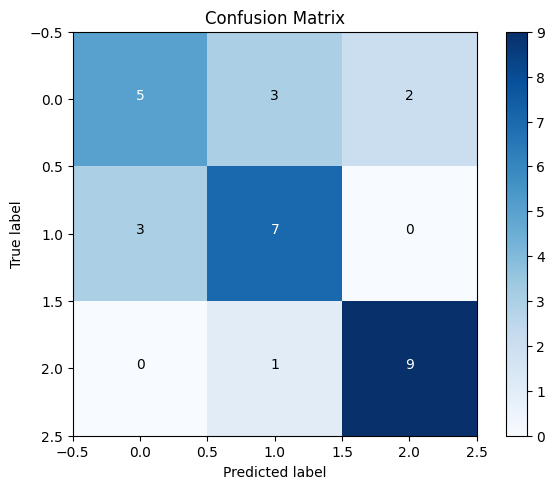

In [66]:
'''
showing the label of our test images in confusion matrix
'''
cm_plot_label = ['car','bus','mot']
plot_confusion_matrix(cm=cm, classes=cm_plot_label, title='Confusion Matrix')

In [70]:
loss, accuracy = model.evaluate(valid_batches)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 318ms/step - accuracy: 0.8286 - loss: 5.7064
Validation Loss: 5.703274726867676
Validation Accuracy: 0.7666666507720947


#1. What challenges did you face during data collection and how did you overcome them?
The data was seperatd in multiple failes so i gathered them into files for train and validation and test and label them in the same time, but the big challenge was the data is small


#2. Why did you choose your specific model architecture?
because i want the high probability of one class to my three clasess

#3. How does the performance of your chosen model compare to alternative
approaches, and what factors contributed to the differences?
the performance was good but is hve an overfting

#4. What did you learn from storing the data in a database, and how did it impact your workflow?
i didn’t use database and i need go back of the database lecture in my on,(beabause no one give us the class of it)

#5. If you were to extend this project, what additional features or improvements would you consider?
explore more data and use Technique to solve overrating problems